In [3]:
#字典，默认值
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = {}

for word in words:
    letter = word[0]
    if letter not in by_letter:
        by_letter[letter] = [word]
    else:
        by_letter[letter].append(word)#不存在，向字典中的value中追加word

by_letter

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}

In [4]:
#setdefault方法就正是干这个的。前面的for循环可以改写为：
for word in words:
    letter = word[0]
    by_letter.setdefault(letter,[]).append(word)
    
by_letter

{'a': ['apple', 'atom', 'apple', 'atom'],
 'b': ['bat', 'bar', 'book', 'bat', 'bar', 'book']}

In [5]:
from collections import defaultdict
by_letter = defaultdict(list)
for word in words:
    by_letter[word[0]].append(word)
by_letter

defaultdict(list, {'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']})

列表、集合和字典推导式

In [7]:
#列表推导式
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']
[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

In [8]:
#集合推导式，与列表相似但是用{}
unique_lengths = {len(x) for x in strings}
unique_lengths

{1, 2, 3, 4, 6}

In [9]:
#用map函数继续简化上式
set(map(len, strings))

{1, 2, 3, 4, 6}

In [10]:
#enumerate函数
#Python内建了一个enumerate函数，可以返回(i, value)元组序列：
some_list = ['foo','bar','baz']
mapping = {}
for i,v in enumerate(some_list):
    mapping[i] = v
mapping

{0: 'foo', 1: 'bar', 2: 'baz'}

In [12]:
#字典推到式
loc_mapping = {val:index for index, val in enumerate(strings)}
loc_mapping

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5}

In [14]:
#嵌套列表推导式
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'], 
            ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
names_of_interest = []
for names in all_data:
    enough_es = [name for name in names if name.count('e')>=2]
    names_of_interest.extend(enough_es)
    
names_of_interest

['Steven']

In [15]:
#可以用嵌套列表推导式的方法，将这些写在一起
result = [name for names in all_data for name in names if name.count('e')>=2]
result

['Steven']

In [1]:
#函数也是对象
#清理一些数据
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?]', '', value)
        value = value.title()
        result.append()
states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 
          'FlOrIda', 'south carolina##', 'West virginia?']


In [3]:
#其实还有另外一种不错的办法：将需要在一组给定字符串上执行的所有运算做成一个列表
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

In [6]:
#还可以将函数用作其他函数的参数，比如内置的map函数，它用于在一组数据上应用一个函数
#类似于java8的map
for x in map(remove_punctuation, states):
    print(x)

 Alabama 
Georgia
Georgia
georgia
FlOrIda
south carolina
West virginia


匿名(lambda)函数
Python支持一种被称为匿名的或者lambd函数。它仅由单条语句组成，该语句的结果就是返回值。
它是通过lambda关键字定义的，这个关键字没有别的含义，仅仅是说“我们正在声明的是一个匿名函数”。

In [7]:
def short_function(x):
    return x * 2
#等价于
equiv_anon = lambda x: x * 2

In [9]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4,0,1,5,6]
apply_to_list(ints, lambda x: x * 2)

[8, 0, 2, 10, 12]

In [11]:
#我们可以传入一个lambda函数到列表的sort方法
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
strings.sort(key = lambda x: len(set(list(x))))
strings

['aaaa', 'foo', 'abab', 'bar', 'card']

In [25]:
"""
生成器(generator)是构造器的可迭代对象的一种简单方式。一般的函数执行之后
只会返回单个值，而生成器则是以延迟的方式返回一个值序列，即每返回一个值之后
暂停，直到下一个被请求再继续。要创建一个生成器，只需将函数中的return替换为yield即可：
"""
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n**2))
    for i in range(1, n+1):
        yield i**2

gen = squares() #调用该生成器时，没有任何代码会被立刻执行
gen

<generator object squares at 0x000001FA9080EA40>

In [26]:
#直到从生成器中请求元素时，它才开始执行代码：
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

In [28]:
#生成器表达式
#另一种更简洁的构造生成器的方法是使用生成器表达式（generator expression）。
#这是一种类似于列表、字典、集合推导式的生成器。其创建方式为，把列表推导式两端的方括号改成圆括号：
gen = (x**2 for x in range(100))
gen

<generator object <genexpr> at 0x000001FA9080E9E8>

In [29]:
#生成器表达式也可以取代列表推导式，作为函数参数
sum(x**2 for x in range(100))

328350

错误和异常处理

In [30]:
#假如想优雅地处理float的错误，让它返回输入值。我们可以写一个函数，在try/except中调用float：
def attempt_float(x):
    try:
        return float(x)
    except:
        return x

In [31]:
#当float(x)抛出异常时，才会执行except的部分：
attempt_float('1.2345')

1.2345

In [32]:
attempt_float('something')

'something'

In [33]:
#你可能注意到float抛出的异常不仅是ValueError：
#你可能只想处理ValueError，TypeError错误（输入不是字符串或数值）可能是合理的bug。可以写一个异常类型：
def attempt_float(x):
    try:
        return float(x)
    except ValueError: #只处理value error
        return x

In [34]:
attempt_float((1,2))

TypeError: float() argument must be a string or a number, not 'tuple'

In [35]:
#可以用元组包含多个异常：
def attempt_float(x):
    try:
        return float(x)
    except (ValueError, TypeError): #只处理多个异常
        return x
attempt_float((1,2))

(1, 2)

In [ ]:
#某些情况下，你可能不想抑制异常，你想无论try部分的代码是否成功，都执行一段代码。可以使用finally：
f = open(path, 'w')

try:
    write_to_file(f)
finally:
    f.close()

In [ ]:
f = open(path, 'w')
try:
write_to_file(f)
except:
print('Failed')
else:
print('Succeeded')
finally:
f.close()

### NumPy基础：数组和矢量计算

NumPy的ndarray：一种多维数组对象

In [1]:
import numpy as np

#Generate some random data
data = np.random.randn(2,3)
data

array([[ 2.01342952,  0.12804486, -1.58882226],
       [-0.89262305, -0.19124121, -0.44824461]])

In [38]:
data*10

array([[-11.92641982,  16.19007442,  -4.55837953],
       [ -5.54562185,  -1.20295553,  -9.69770507]])

In [39]:
data+data

array([[-2.38528396,  3.23801488, -0.91167591],
       [-1.10912437, -0.24059111, -1.93954101]])

In [40]:
#每个数组都有一个shape（一个表示各维度大小的元组）和一个dtype（一个用于说明数组数据类型的对象）
print(data.shape)
print(data.dtype)

(2, 3)
float64


#### 创建ndarray

In [43]:
#创建数组最简单的办法就是使用array函数。它接受一切序列型的对象（包括其他数组），
#然后产生一个新的含有传入数据的NumPy数组。
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [44]:
#嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [45]:
#验证维度ndim和形状shape
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In [47]:
"""
zeros和ones分别可以创
建指定长度或形状的全0或全1数组。empty可以创建一个没有任何具体值的数
组。要用这些方法创建多维数组，只需传入一个表示形状的元组即可
"""
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [50]:
np.empty((2,3,2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [51]:
#arange是Python内置函数range的数组版
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [54]:
#可以通过ndarrydeastype方法明确地将一个数组从一个dtype转换为另一个dtype
arr = np.array([1,2,3,4,5])
arr.dtype #dtype('int32')
float_arr = arr.astype(np.float64)
float_arr.dtype #dtype('float64')

dtype('float64')

In [56]:
#如果将浮点数转换成整数，则小数部分将会被截取删除
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

NumPy数组的运算

In [59]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
print(arr)
print(arr*arr)
print(arr-arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [62]:
#数组与标量的算术运算会将标量值传播到各个元素：
print(1/arr)
print(arr*0.5)

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]]


In [66]:
#大小相同的数组之间的比较会生成布尔值数组
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2)
arr2 > arr
#不同大小的数组之间的运算叫做广播（broadcasting）

[[ 0.  4.  1.]
 [ 7.  2. 12.]]


array([[False,  True, False],
       [ True, False,  True]])

基本的索引和切片

In [69]:
"""如上所示，当你将一个标量值赋值给一个切片时（如arr[5:8]=12），该值会自动
传播（也就说后面将会讲到的“广播”）到整个选区。跟列表最重要的区别在于，
数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直
接反映到源数组上"""
arr = np.arange(10)
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [70]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,     5, 12345,     7,     8,
           9])

In [71]:
#切片[ : ]会给数组中的所有值赋值
arr_slice[:] = 64
arr
#如果你想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，例如arr[5:8].copy()。

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

布尔类型索引

In [76]:
#来看这样一个例子，假设我们有一个用于存储数据的数组以及一个存储姓名的数组（含有重复项）。
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [77]:
data

array([[-1.16353943, -0.25898691, -0.88593942,  0.6971944 ],
       [-0.96216507, -0.28566003, -0.58424732,  0.44417259],
       [-0.71990473, -0.03061771,  0.18055718,  0.13358286],
       [ 0.37131505,  0.84844577,  1.22977216,  0.78405412],
       [-0.87689254, -0.14919674, -1.30502772, -0.70371188],
       [ 0.2865141 ,  0.83396347,  0.855432  ,  0.09855867],
       [ 1.40404982,  0.93680303,  0.05189366,  0.47612287]])

In [78]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [79]:
data[names == 'Bob']

array([[-1.16353943, -0.25898691, -0.88593942,  0.6971944 ],
       [ 0.37131505,  0.84844577,  1.22977216,  0.78405412]])

In [80]:
data[data < 0]

array([-1.16353943, -0.25898691, -0.88593942, -0.96216507, -0.28566003,
       -0.58424732, -0.71990473, -0.03061771, -0.87689254, -0.14919674,
       -1.30502772, -0.70371188])

In [81]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.96216507, -0.28566003, -0.58424732,  0.44417259],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.2865141 ,  0.83396347,  0.855432  ,  0.09855867],
       [ 1.40404982,  0.93680303,  0.05189366,  0.47612287]])

花式索引

In [82]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [83]:
#为了以特定顺序选取行子集，只需传入一个用于指定顺序的整数列表或ndarray即可：
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [84]:
#使用负数索引将会从末尾开始选取行：
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [85]:
#一次传入多个索引数组
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [86]:
arr[[1,5,7,2],[0,3,1,2]] #传入两个列表，应该是条件递进的关系，不会得到一个区域

array([ 4, 23, 29, 10])

In [95]:
#如果想得到矩阵的一个区域应该这样
arr[[1,5,7,2]][:, [0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [100]:
arr1 = np.eye(5)
arr2 = np.arange(25).reshape(5,5)
#arr1.dot(arr2)
np.dot(arr1,arr2)

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

通用函数：快速的元素级数组函数

In [2]:
"""通用函数（即ufunc）是一种对ndarray中的数据执行元素级运算的函数。你可以
将其看做简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化
包装器"""
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.sqrt(arr) #平方

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [4]:
np.exp(arr) #以e为底

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [5]:
x = np.random.randn(8)
y = np.random.randn(8)
np.maximum(x,y)

array([ 0.63861963,  1.04804192,  1.67192998,  0.14754445,  1.06047574,
        0.49903046,  0.79743019, -0.08397952])

利用数组进行数据处理

In [11]:
"""
作为简单的例子，假设我们想要在一组值（网格型）上计算函数sqrt(x^2+y^2)。
np.meshgrid函数接受两个一维数组，并产生两个二维矩阵（对应于两个数组中所
有的(x,y)对）：
"""
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points,points)
xs
ys #产生了两个轴向上的矩阵

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [12]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

将条件逻辑表述为数组运算
<br>numpy.where函数是三元表达式x if condition else y的矢量化版本。

In [14]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result #用zip将纵向每3个元素打成包，一个元组

[1.1, 2.2, 1.3, 1.4, 2.5]

In [15]:
"""
以上代码有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯
Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能
写得非常简洁：
"""
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [18]:
"""假设有一个由随机
数据组成的矩阵，你希望将所有正值替换为2，将所有负值替换为－2。若利用
np.where，则会非常简单"""
#使用标量
arr = np.random.randn(4, 4)
np.where(arr > 0, 2, -2)

array([[-2,  2, -2,  2],
       [-2,  2,  2,  2],
       [-2,  2, -2, -2],
       [-2, -2, -2, -2]])

In [19]:
#使用np.where，可以将标量和数组结合起来。例如，我可用常数2替换arr中所有正的值
np.where(arr > 0, 2, arr)

array([[-0.16741715,  2.        , -1.77877288,  2.        ],
       [-1.69604075,  2.        ,  2.        ,  2.        ],
       [-1.13040188,  2.        , -0.59807449, -0.81664097],
       [-1.17387682, -1.64931396, -1.60713189, -0.0326502 ]])

数学和统计方法

In [20]:
"""可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。
sum、mean以及标准差std等聚合计算（aggregation，通常叫做约简
（reduction））既可以当做数组的实例方法调用，也可以当做顶级NumPy函数
使用。"""
#这里，我生成了一些正态分布随机数据，然后做了聚类统计：
arr = np.random.randn(5,4)
arr

array([[ 0.08460982,  0.4258595 ,  1.03284817,  1.05194495],
       [-0.17115048, -0.28326927, -2.05644514, -0.00708252],
       [-0.50029026, -0.40331287, -1.19291529, -0.4112199 ],
       [ 0.04448087,  0.36576935, -0.14554128,  0.22889394],
       [-0.67434719,  0.70048333,  0.60669123,  0.27728802]])

In [21]:
arr.mean()

-0.05133525052943977

In [22]:
np.mean(arr)

-0.05133525052943977

In [23]:
arr.sum()

-1.0267050105887954

In [24]:
#mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，最终结果是一个少一维的数组：
#这里，arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”。
arr.mean(axis = 1)

array([ 0.64881561, -0.62948685, -0.62693458,  0.12340072,  0.22752885])

In [25]:
arr.sum(axis = 0)

array([-1.21669724,  0.80553005, -1.75536229,  1.13982448])

用于布尔型数组的方法

In [26]:
"""在上面这些方法中，布尔值会被强制转换为1（True）和0（False）。因此，sum
经常被用来对布尔型数组中的True值计数："""
arr = np.random.randn(100)

(arr > 0).sum()

49

In [27]:
"""另外还有两个方法any和all，它们对布尔型数组非常有用。any用于测试数组中是
否存在一个或多个True，而all则检查数组中所有值是否都是True"""
bools = np.array([False, False, True, False])
bools.any()

True

In [28]:
bools.all()

False

唯一化以及其它的集合逻辑

In [29]:
"""NumPy提供了一些针对一维ndarray的基本集合运算。最常用的可能要数
np.unique了，它用于找出数组中的唯一值并返回已排序的结果"""
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [30]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [31]:
#另一个函数np.in1d用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

线性代数

In [32]:
#x.dot(y)等价于np.dot(x, y)

In [33]:
#numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。
from numpy.linalg import inv, qr
X = np.random.randn(5,5)
mat = X.T.dot(X)
mat

array([[ 5.35042474, -1.29557964, -1.48910083,  1.57186394,  0.68964454],
       [-1.29557964,  5.58167425, -0.05744006, -4.08979087, -0.19048196],
       [-1.48910083, -0.05744006,  2.84618788,  4.12940387,  2.56366428],
       [ 1.57186394, -4.08979087,  4.12940387, 10.97816886,  4.74654648],
       [ 0.68964454, -0.19048196,  2.56366428,  4.74654648,  3.95872034]])

In [34]:
inv(mat)

array([[  9.36329705,  -4.92677263,  24.24082518,  -9.75729169,
         -5.86747865],
       [ -4.92677263,   3.08395468, -13.17685194,   5.5773379 ,
          2.8527124 ],
       [ 24.24082518, -13.17685194,  64.14493358, -25.84592247,
        -15.40768295],
       [ -9.75729169,   5.5773379 , -25.84592247,  10.79755053,
          5.75959805],
       [ -5.86747865,   2.8527124 , -15.40768295,   5.75959805,
          4.48422467]])

In [35]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -2.89347281e-15, -1.17821673e-14,
         6.13771860e-15,  2.65225745e-15],
       [-4.99173945e-15,  1.00000000e+00, -4.33604347e-15,
        -4.91192568e-15, -2.25660457e-15],
       [ 5.71062303e-15,  1.68480455e-15,  1.00000000e+00,
        -8.16608657e-15, -2.39435660e-15],
       [ 8.64427767e-15,  1.64700030e-15,  3.84979319e-15,
         1.00000000e+00,  4.58355839e-15],
       [-4.10292468e-15,  1.02247300e-14, -1.52910283e-14,
        -1.52822345e-15,  1.00000000e+00]])

In [36]:
q,r = qr(mat) #奇异分解
r

array([[-5.95561572,  3.46527234,  0.65019078, -4.71644069, -1.73116546],
       [ 0.        , -6.13118861,  2.96592838,  8.89881991,  2.65388055],
       [ 0.        ,  0.        , -4.97256249, -8.81285686, -5.88917018],
       [ 0.        ,  0.        ,  0.        , -0.44582757,  0.7483954 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.05477966]])

伪随机数生成

In [37]:
"""numpy.random模块对Python内置的random进行了补充，增加了一些用于高效
生成多种概率分布的样本值的函数。例如，你可以用normal来得到一个标准正态
分布的4×4样本数组"""
samples = np.random.normal(size=(4,4))
samples

array([[-0.72698258, -0.33872093,  1.90986152,  1.80961185],
       [-0.24096636,  0.18213487,  0.79374358,  1.4600406 ],
       [-0.62384923,  0.143986  , -0.51883686, -0.98267753],
       [-0.14287291,  1.13359791, -0.98399801,  0.35193375]])

**示例：随机漫步**

In [39]:
#先来看一个简单的随机漫步的例子：从0开始，步长1和－1出现的概率相等。
#下面是一个通过内置的random模块以纯Python的方式实现1000步的随机漫步：
import matplotlib.pyplot as plt
import random

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

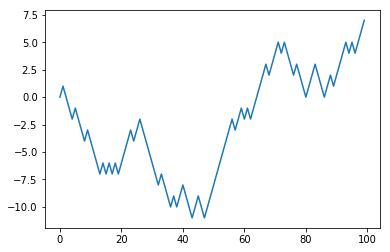

In [40]:
plt.plot(walk[:100])

In [47]:
nsteps = 1000
draws = np.random.randint(0,2,size=1000)
steps = np.where(draws>0,1,-1)
walk = steps.cumsum()

In [43]:
walk.max()

9

In [44]:
walk.min()

-20

In [50]:
#一次模拟多个随机漫步
"""如果你希望模拟多个随机漫步过程（比如5000个），只需对上面的代码做一点点
修改即可生成所有的随机漫步过程。只要给numpy.random的函数传入一个二元
元组就可以产生一个二维数组，然后我们就可以一次性计算5000个随机漫步过程
（一行一个）的累计和了"""
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[ -1,  -2,  -1, ...,  46,  47,  46],
       [  1,   0,  -1, ..., -20, -19, -18],
       [  1,   0,  -1, ...,  -8,  -9, -10],
       ...,
       [ -1,  -2,  -3, ...,  54,  53,  54],
       [ -1,   0,  -1, ..., -12, -11, -10],
       [ -1,   0,  -1, ..., -16, -17, -16]], dtype=int32)

In [51]:
walks.max()

123

In [52]:
walks.min()

-142

In [55]:
hits30 = (np.abs(walks)>=30).any(1)
hits30

array([ True, False,  True, ...,  True, False,  True])

In [56]:
hits30.sum()

3433